### RLab01 - Martina Cacciola (2097476)

## Exercise 1

### a)

The posterior mean for a prior uniform distribution is: 5.636364
The posterior median is: 5.60609
The posterior variance is: 0.5123967

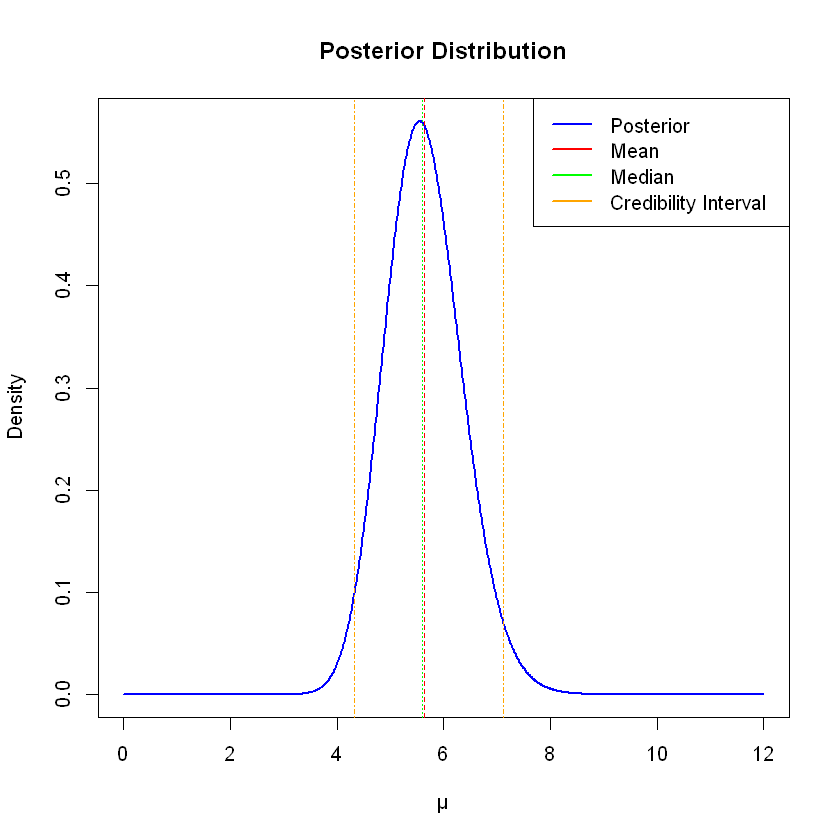

In [1]:
# Observed data
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- length(y)

# Prior: Uniform distribution
a <- 1
b <- 1
# Posterior distribution
a.post1 <- a + sum(y)
b.post1 <- b + n
# Posterior mean
mean.post1 <- a.post1 / b.post1
# Posterior median
median.post1 <- qgamma(0.5, shape = a.post1, rate = b.post1)
# Posterior variance
var.post1 <- a.post1 / (b.post1^2)
cat("The posterior mean for a prior uniform distribution is:", mean.post1)
cat("\nThe posterior median is:", median.post1)
cat("\nThe posterior variance is:", var.post1)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post1, rate = b.post1)
upper_bound <- qgamma(0.975, shape = a.post1, rate = b.post1)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post1, rate = b.post1)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post1, lty = 2, col = "red")
abline(v = median.post1, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topright", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### b)

The posterior mean for a Jeffrey's prior is: 7.97619
The posterior median is: 7.944467
The posterior variance is: 0.7596372

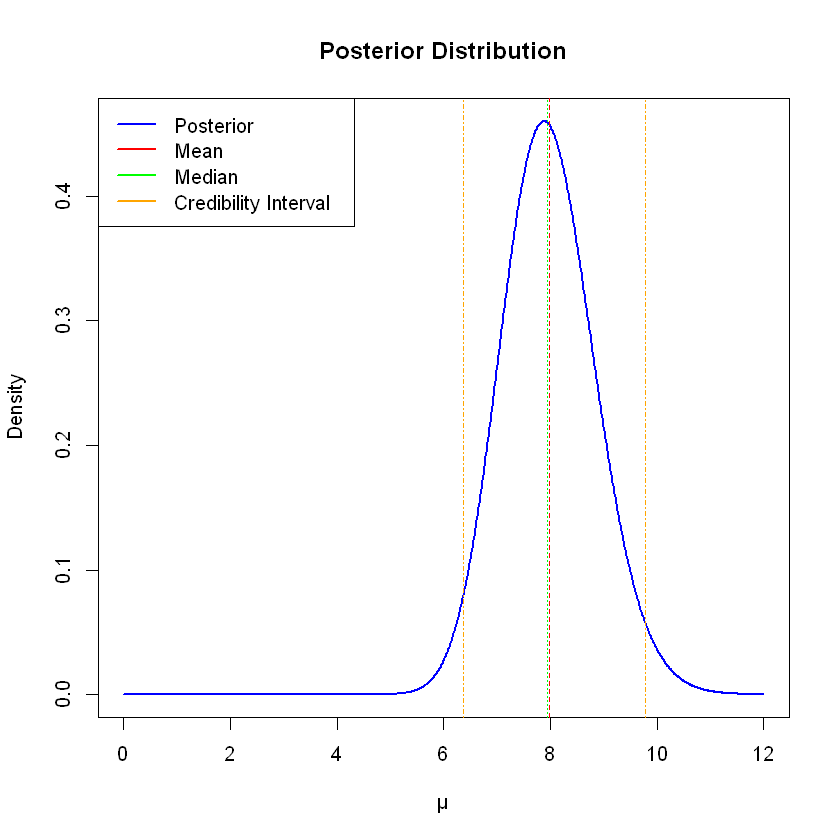

In [2]:
# Jeffreys' prior
a <- 0.5
b <- 0.5
# posterior distribution
a.post2 <- a + sum(y)
b.post2 <- b + n
# posterior mean
mean.post2 <- a.post2 / b.post2
# posterior median
median.post2 <- qgamma(0.5, shape = a.post2, rate = b.post2)
# posterior variance
var.post2 <- a.post2 / (b.post2^2)
cat("The posterior mean for a Jeffrey's prior is:", mean.post2)
cat("\nThe posterior median is:", median.post2)
cat("\nThe posterior variance is:", var.post2)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post2, rate = b.post2)
upper_bound <- qgamma(0.975, shape = a.post2, rate = b.post2)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post2, rate = b.post2)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post2, lty = 2, col = "red")
abline(v = median.post2, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topleft", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### c)

In [3]:
# 95% credibility interval for Uniform prior
ci.uniform <- qgamma(c(0.025,0.975), shape = a.post1, rate = b.post1)

# 95% credibility interval for Jeffrey's prior
ci.jeffreys <- qgamma(c(0.025,0.975), shape = a.post2, rate = b.post2)

# Normal approximation of posterior distribution
ci_unif_norm <- qnorm(c(0.025, 0.975), mean = mean.post1, sd = sqrt(var.post1))
ci_jeff_norm <- qnorm(c(0.025, 0.975), mean = mean.post2, sd = sqrt(var.post2))

cat("95% credibility interval using uniform prior:", ci.uniform, "\n")
cat("95% credibility interval using Jeffreys' prior:", ci.jeffreys, "\n")
cat("95% confidence interval using normal approximation (uniform prior):", ci_unif_norm, "\n")
cat("95% confidence interval using normal approximation (Jeffrey's prior):", ci_jeff_norm)

95% credibility interval using uniform prior: 4.321368 7.123368 
95% credibility interval using Jeffreys' prior: 6.359854 9.772782 
95% confidence interval using normal approximation (uniform prior): 4.233384 7.039343 
95% confidence interval using normal approximation (Jeffrey's prior): 6.267941 9.68444

## Exercise 2

### a)

Let `H` be the event of a patient having the disease, and `F` be the event of the new method failing to detect the disease. We know that `P(F|H) = 0.15`. Therefore, `P(D|H) = 0.85`, i.e., the probability of detecting the disease (event `D`) given that the patient has the disease.

A random sample of `n = 75` patients known to have the disease is screened using the new method. Let `Y` be the number of times the new method fails to detect the disease in this sample. Then `Y` has a **binomial** distribution with parameters `n = 75` and `p = 0.15`.

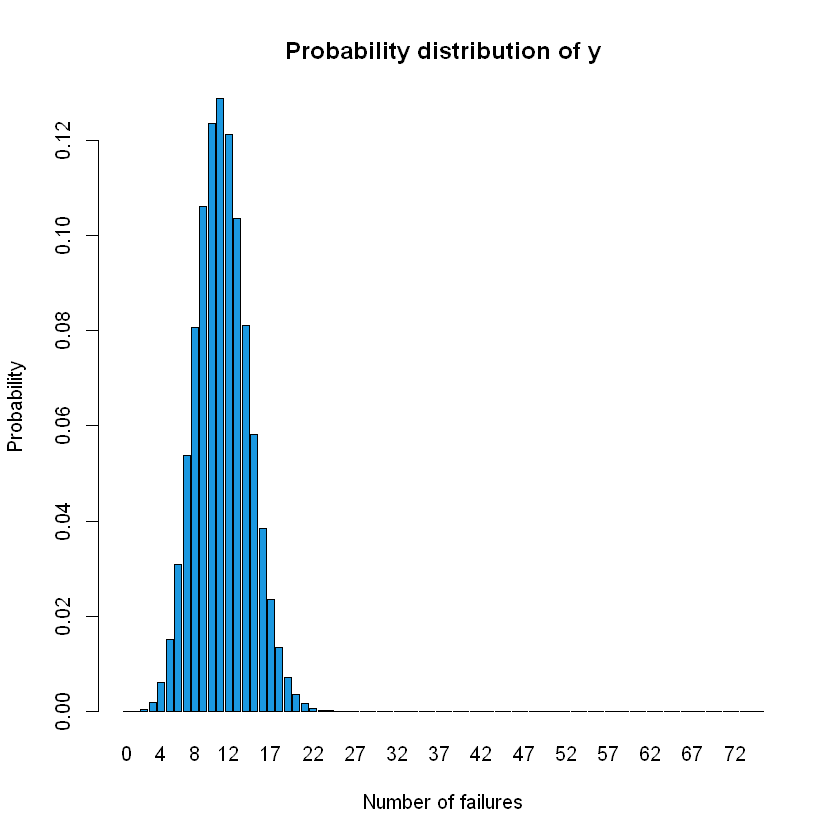

In [14]:
#number of trials
n <- 75
p <- 0.15
#number of failures
y <- 0:n
# probability distribution of failure
prob_y <- dbinom(y, size = n, prob = p)

# plot the probability distribution
barplot(prob_y, names.arg = y, xlab = "Number of failures", ylab = "Probability", main = "Probability distribution of y", col="#1b98e0")

### b)

If `y` is the number of patients in which the method fails to detect the disease and `n` is the total number of patients in the sample, then the frequentist estimator of the failure probability is given by:
$ \hat{p}=\frac{y}{n} $

In [2]:
y <- 6
# failure probability (frequentist estimator) 
p_hat <- y/n
cat("The frequentist estimation of the failure probability is:", p_hat*100, "%")

The frequentist estimation of the failure probability is: 8 %

### c)

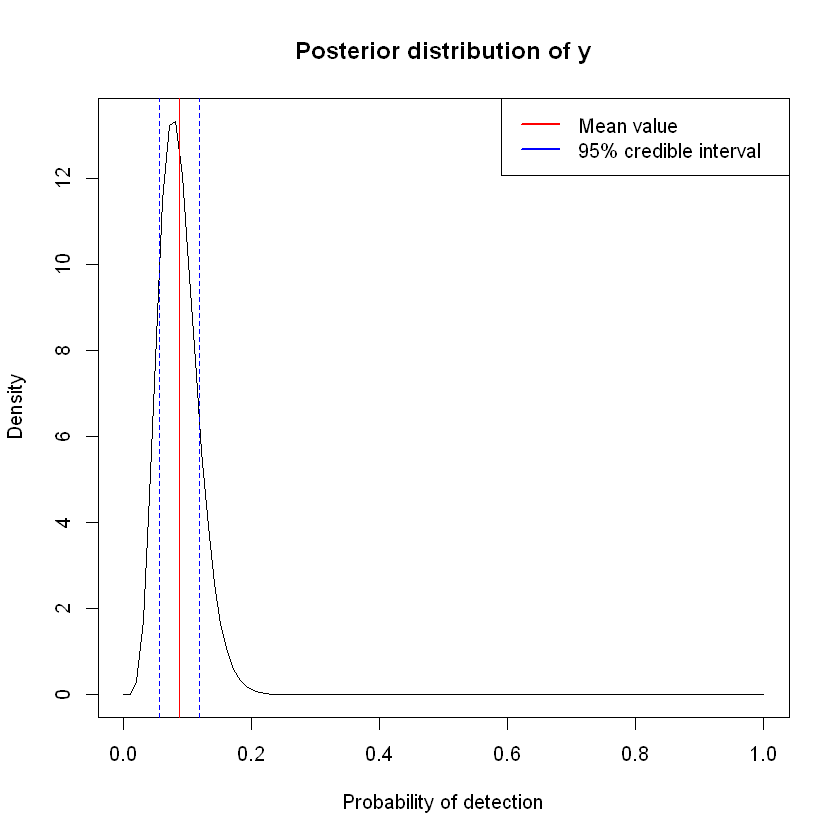

In [18]:
# Set the prior distribution parameters
alpha <- 0.15^2 / 0.14^2
beta <- alpha * (1 - 0.15) / 0.15

# Set the sample size and number of successes
n <- 75
y <- 6

# Compute the posterior distribution
posterior_alpha <- alpha + y
posterior_beta <- beta + n - y

# Compute the posterior mean and variance
posterior_mean <- posterior_alpha / (posterior_alpha + posterior_beta)
posterior_variance <- (posterior_alpha * posterior_beta) / ((posterior_alpha + posterior_beta)^2 * (posterior_alpha + posterior_beta + 1))

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, posterior_alpha, posterior_beta)
plot(x, posterior, type = "l", xlab = "Probability of detection", ylab = "Density", main = "Posterior distribution of y")
abline(v = posterior_mean, col = "red")
abline(v = posterior_mean + sqrt(posterior_variance), col = "blue", lty = "dashed")
abline(v = posterior_mean - sqrt(posterior_variance), col = "blue", lty = "dashed")
legend("topright", c("Mean value", "95% credible interval"),
       col = c("red", "blue"), lwd = 2)

### d) Bayesian paradigm

Posterior probability of null hypothesis:  96.66 %
Posterior probability of alternative hypothesis:  3.34 %
Cannot reject the null hypothesis: The new test is no better than the traditional method.


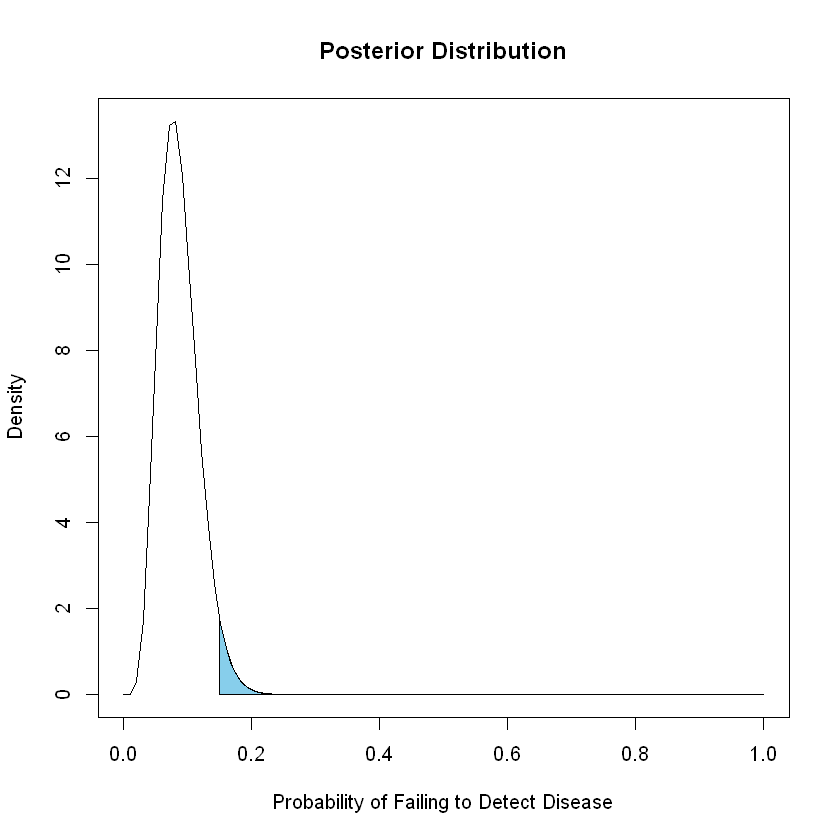

In [19]:
# The probability of failing is greater or equal to 15% = NULL hypothesis
null_posterior <- pbeta(0.15, shape1 = posterior_alpha, shape2 = posterior_beta)
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# Perform the hypothesis test with 5% level of significance
if (null_posterior <= 0.05) {
  cat("Reject the null hypothesis: The new test is better than the traditional method.\n")
} else {
  cat("Cannot reject the null hypothesis: The new test is no better than the traditional method.\n")
}

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, posterior_alpha, posterior_beta)
plot(x, posterior, type = "l", main = "Posterior Distribution", xlab = "Probability of Failing to Detect Disease", ylab = "Density")

# Shade the critical region
crit_x <- seq(0.15, 1, length.out = 100)
crit_y <- dbeta(crit_x, posterior_alpha, posterior_beta)
polygon(c(crit_x, rev(crit_x)), c(rep(0, length(crit_x)), rev(crit_y)), col = "skyblue")

In the graph, it is shown the **critical region** (where the probability of failing to detect the disease is less than or equal to 15%), i.e. the range of values for which we would reject the NULL hypothesis. It can be said that there is not enough evidence to support the alternative hypothesis.

### e) Frequentist paradigm

We perform a binomial test with the null hypothesis that the probability of failing to detect the disease in ill patients is greater than or equal to 15% (`p = 0.15`). We impose a 5% significance level, that will be compared to the p-value computed from the test.

The p-value of the test is 0.0543533 
Cannot reject the null hypothesis: The new test is no better than the traditional method.


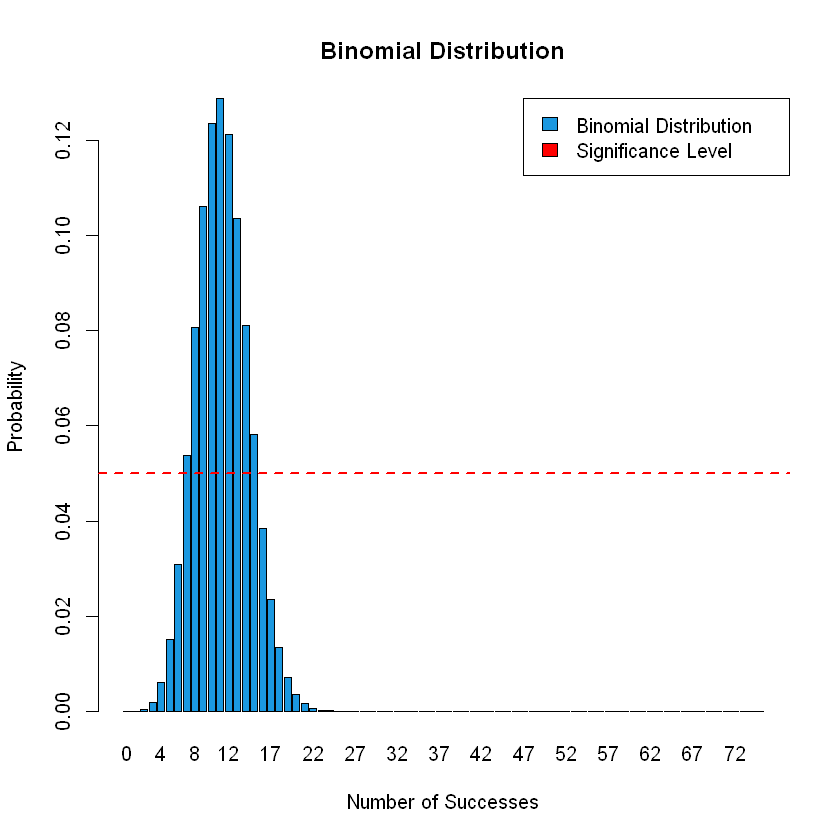

In [22]:
# Perform the binomial test
test_result <- binom.test(y, n, p = 0.15, alternative = "less")

# Report the result of the test
cat("The p-value of the test is", test_result$p.value, "\n")
if (test_result$p.value <= 0.05) {
  cat("Reject the null hypothesis: The new test is better than the traditional method.\n")
} else {
  cat("Cannot reject the null hypothesis: The new test is no better than the traditional method.\n")
}

# Plot the binomial distribution
x <- 0:n
prob <- dbinom(x, n, 0.15)
barplot(prob, names.arg = x, main = "Binomial Distribution", col = "#1b98e0", xlab = "Number of Successes", ylab = "Probability")

# Add a horizontal line representing the significance level
abline(h = 0.05, col = "red", lwd = 2, lty = 'dashed')

legend("topright", legend = c("Binomial Distribution", "Significance Level"),
       fill = c("#1b98e0", "red"), lty = 0)

This plot shows the binomial distribution under the null hypothesis that the probability of failing to detect the disease in ill patients is greater than or equal to 15%, and highlights the significance level in red. The area below this line represents the acceptance region of the test, where we cannot reject the null hypothesis at a significance level of 5%. The area below instead represents the rejection region of the test. 
The larger area above the significance level indicates that, under the null hypothesis, it is more likely to observe a result as extreme as or more extreme than the observed data. 

## Exercise 3

The posterior probability for each combination of $\alpha$ and $\beta$ is computed by multiplying the likelihood of the data given $\alpha$ and $\beta$, with the prior probability, which is assumed to be uniform over the range of values for $\alpha$ and $1/\sqrt \beta$ over the range of values for $\beta$. The $1/4\pi$ term represents a uniform prior over the azimuth angle.

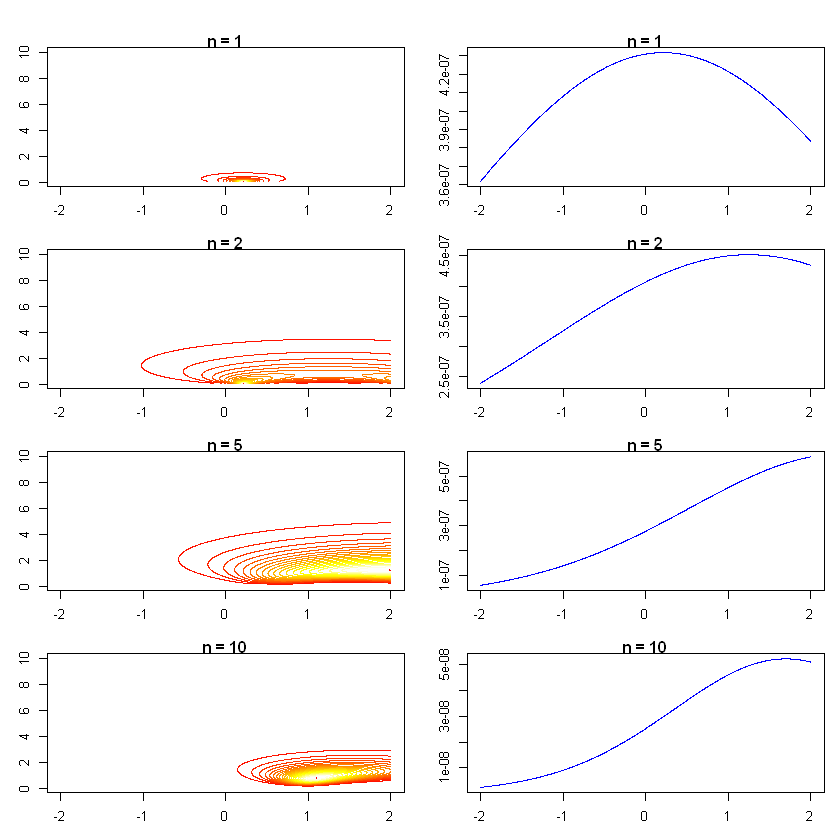

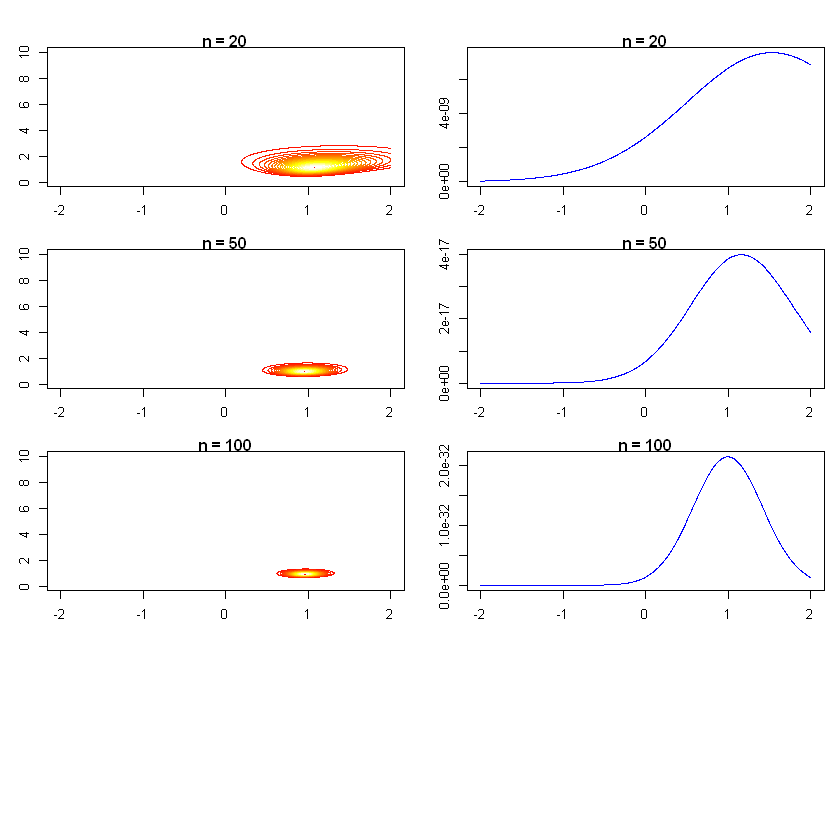

In [35]:
# Likelihood function
likelihood <- function(x, alpha, beta) {
  return(prod(1 / pi * beta / (beta^2 + (x - alpha)^2)))
}

# Posterior function
posterior <- function(x, alpha_range, beta_range, n) {
  alpha_grid <- seq(min(alpha_range), max(alpha_range), length.out = 1000)
  beta_grid <- seq(min(beta_range), max(beta_range), length.out = 1000)
  posterior_grid <- matrix(0, nrow = length(alpha_grid), ncol = length(beta_grid))
  for (i in 1:length(alpha_grid)) {
    for (j in 1:length(beta_grid)) {
      posterior_grid[i,j] <- likelihood(x[1:n], alpha_grid[i], beta_grid[j]) * 1/(4*pi) * 1/sqrt(beta_grid[j])
    }
  }
  posterior_grid <- posterior_grid / sum(posterior_grid)
  return(list(alpha = alpha_grid, beta = beta_grid, posterior = posterior_grid))
}


# Generate sample data
set.seed(123)
beta_true <- 1
alpha_true <- 1
x <- alpha_true + beta_true * tan(runif(1000, -pi/2, pi/2))

# Plot posterior for different sample sizes
sample_sizes <- c(1, 2, 5, 10, 20, 50, 100)
par(mfrow=c(4,2), mar=c(3,3,1,1), oma=c(0,0,2,0))

for (i in 1:length(sample_sizes)) {
  n <- sample_sizes[i]
  post <- posterior(x, alpha_range = c(-2, 2), beta_range = c(0.1, 10), n = n)

# Contour plot
  contour(post$alpha, post$beta, post$posterior, main = paste("n =", n), xlab = expression(alpha), ylab = expression(beta), col = heat.colors(20), levels = seq(0, max(post$posterior), length.out = 20 + 1), drawlabels = FALSE)
  
  # Plot of posterior function
  plot(post$alpha, post$posterior[ , nrow(post$posterior) / 2], type = "l", main = paste("n =", n), xlab = expression(alpha), ylab = "Posterior", col = "blue")
}
mtext(expression(paste("Posterior Distribution for ", alpha, " and ", beta)), outer = TRUE, cex = 1.5, font = 2, line = 2) 

As expected, by increasing the number of detections, our knownledge about the true position increases as well. It is clear that the area where the lighthouse is predicted to be is way more constrained at `n=100`.

## Exercise 4

### a)

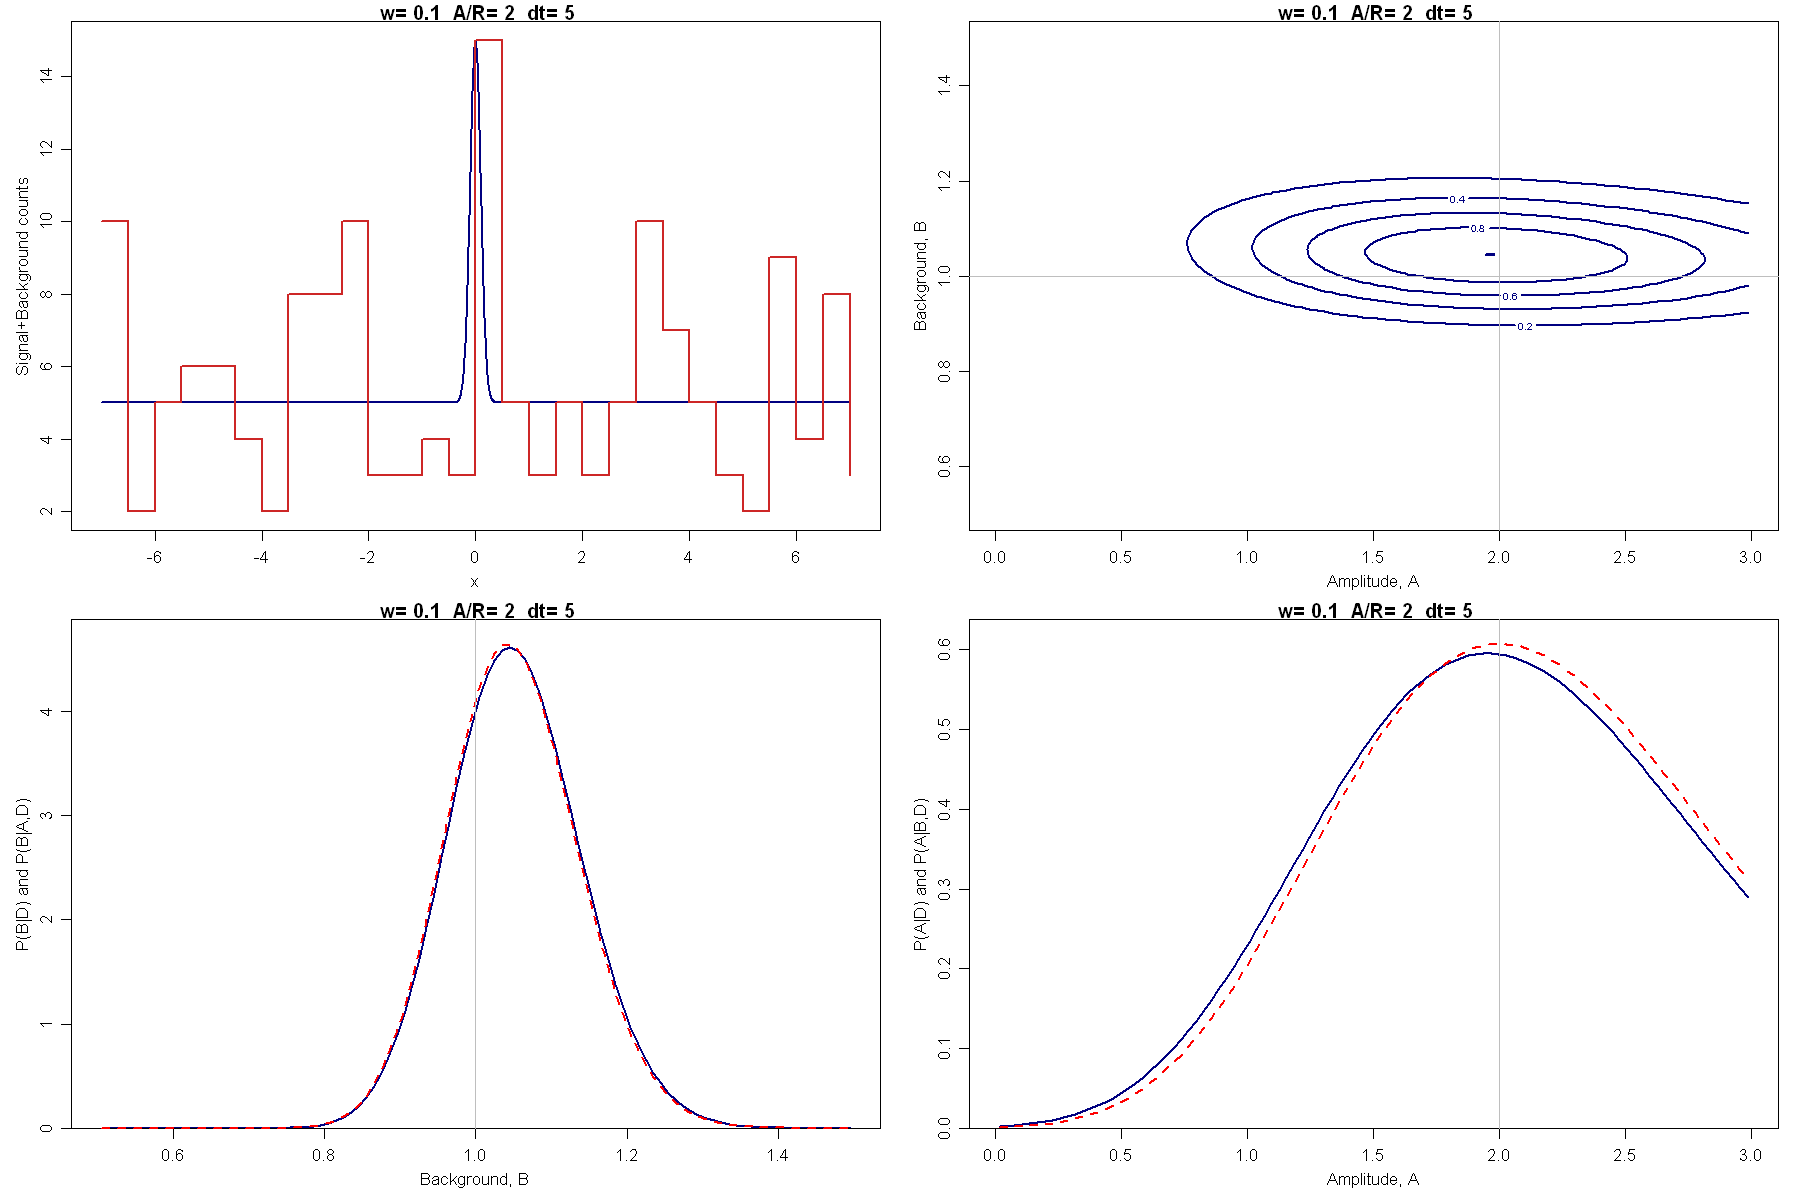

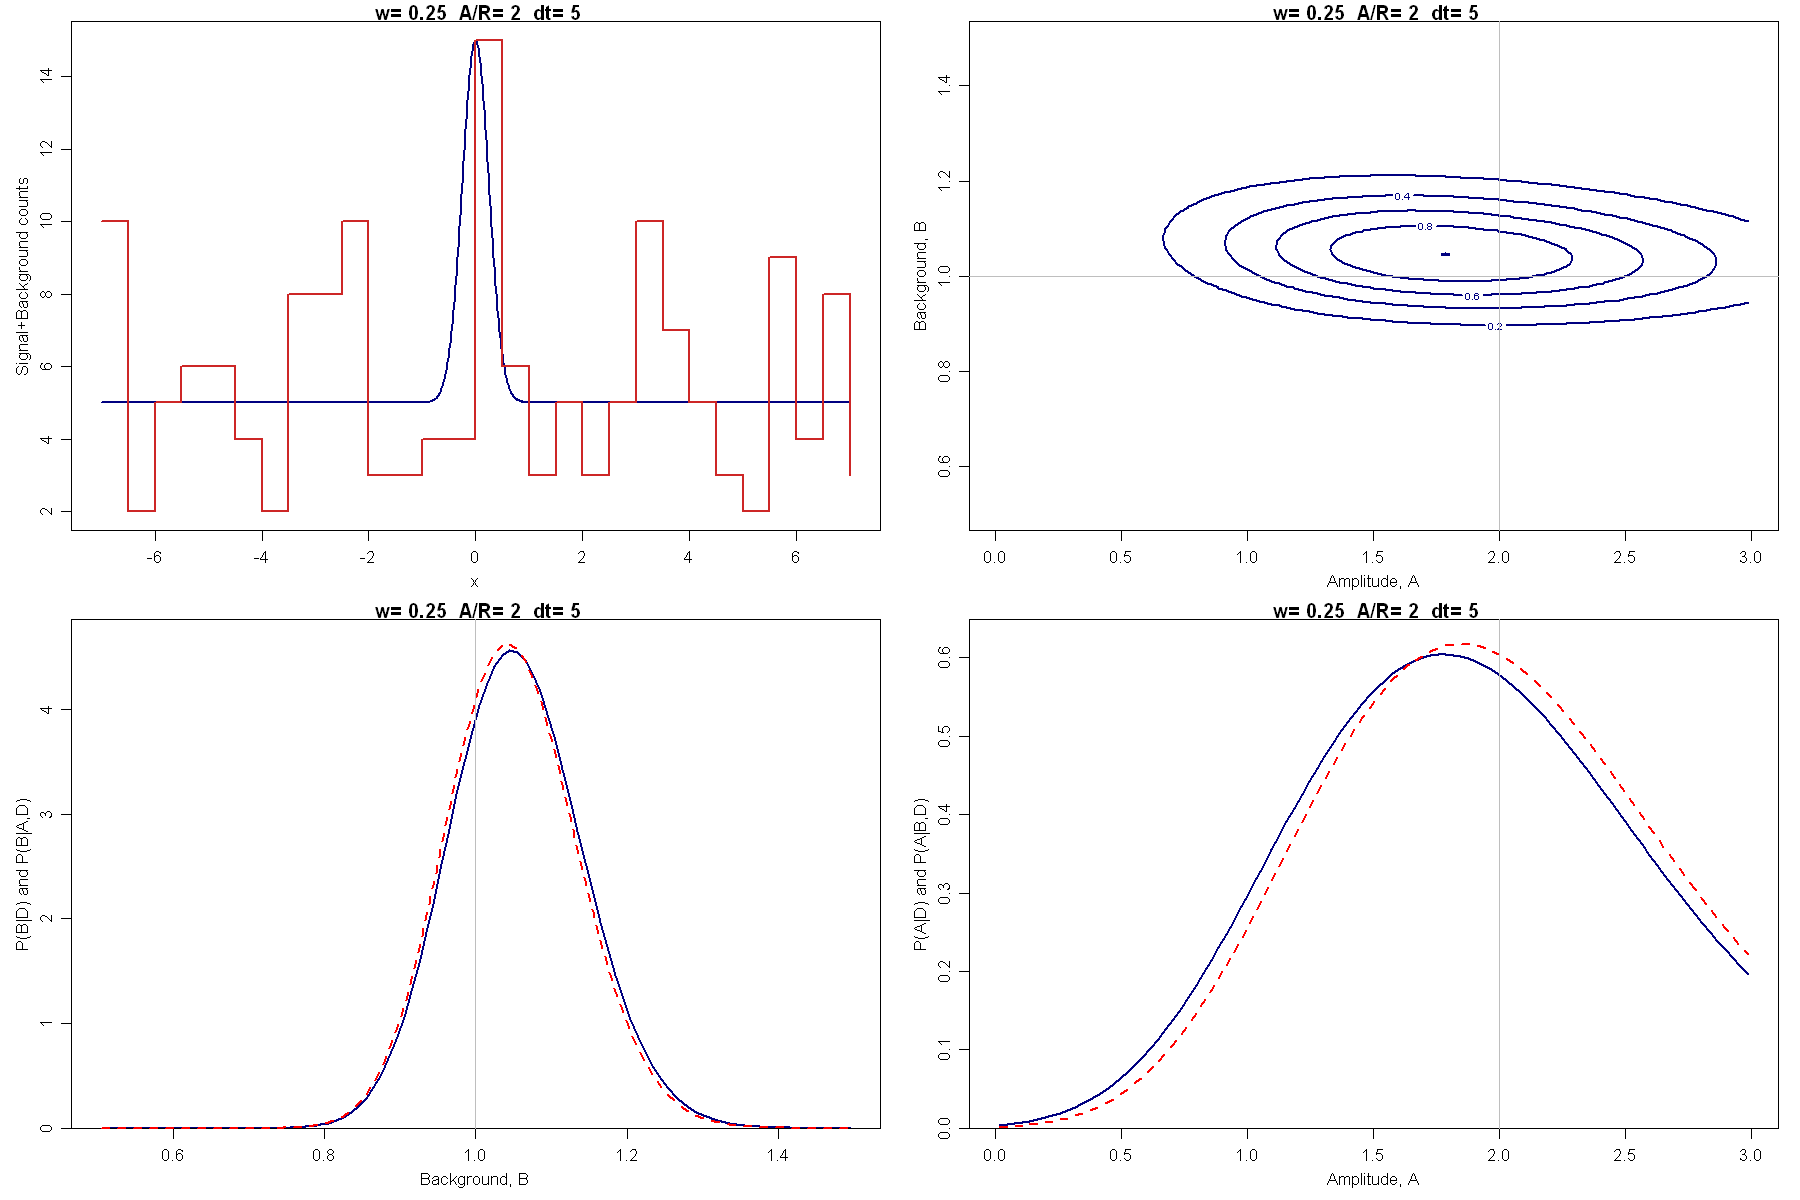

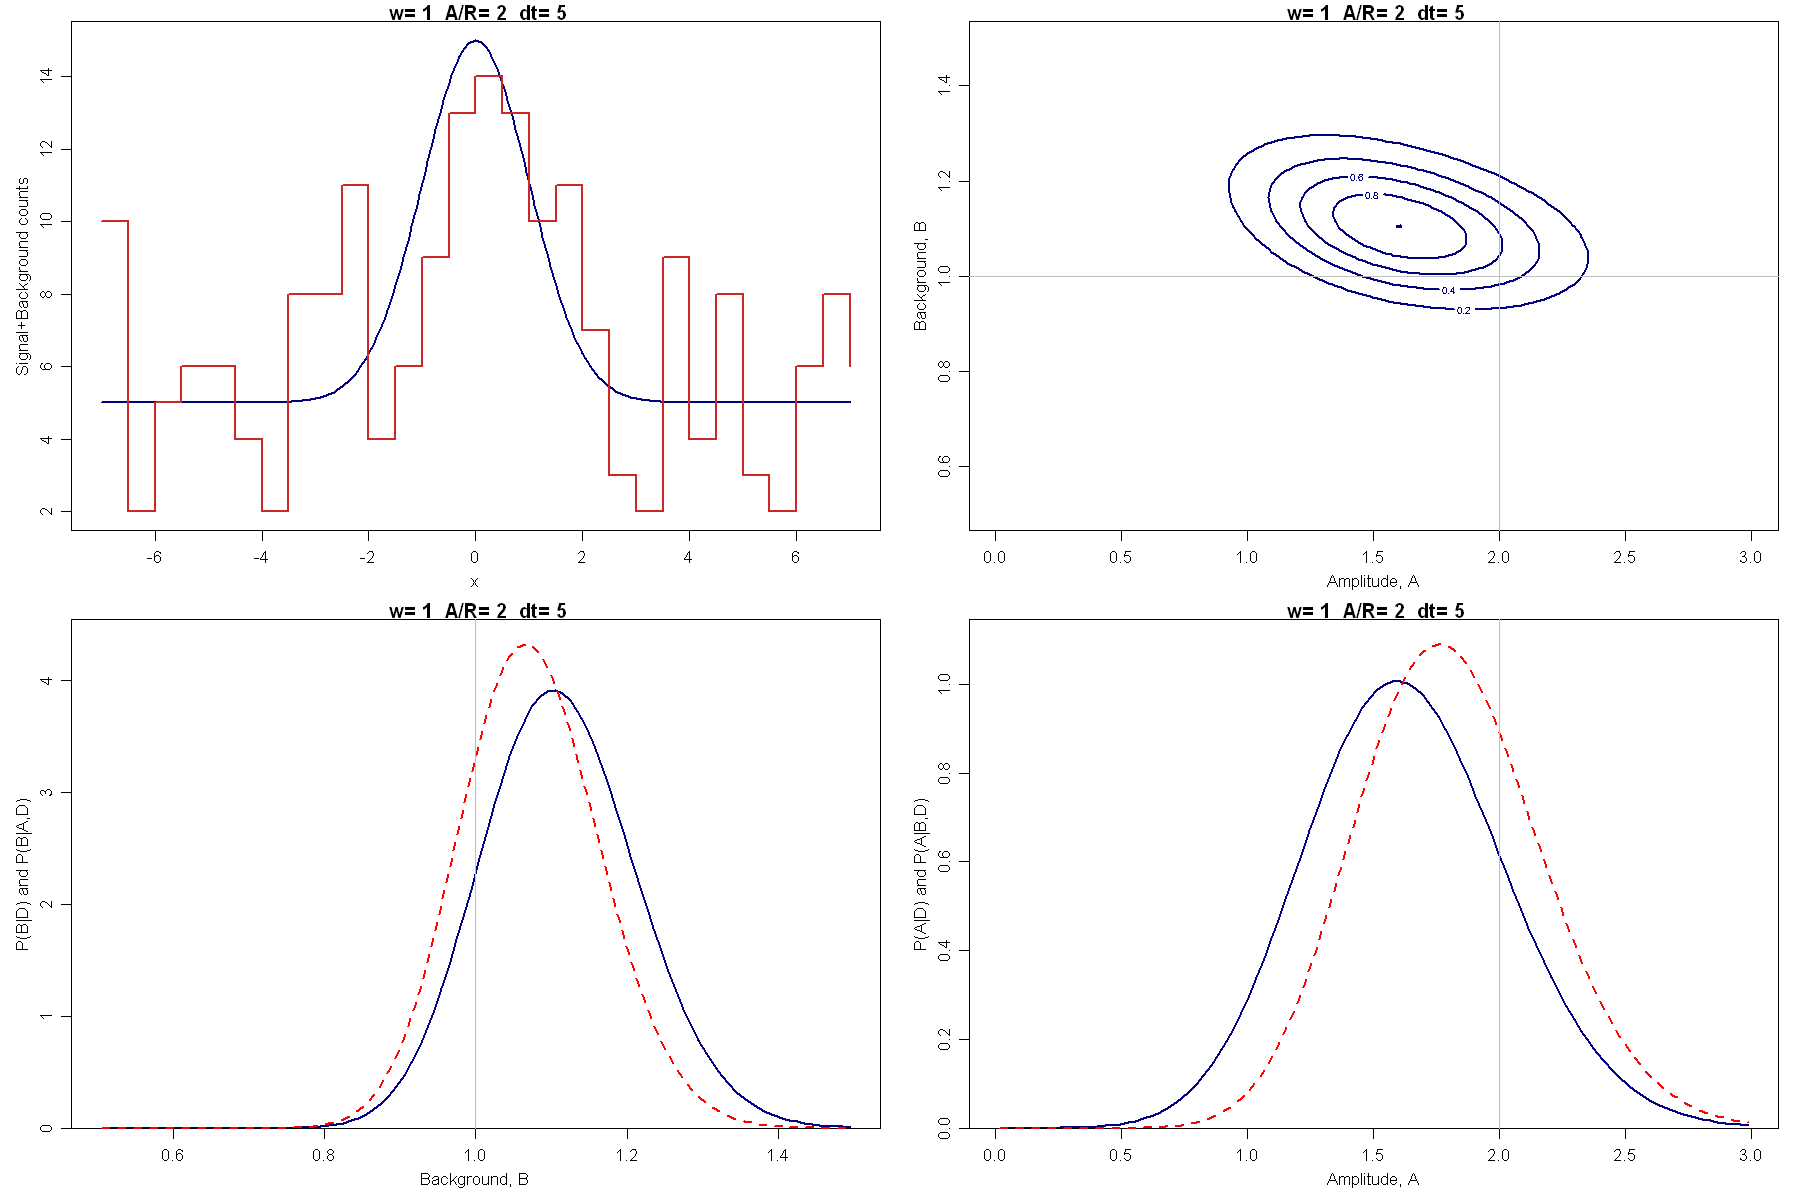

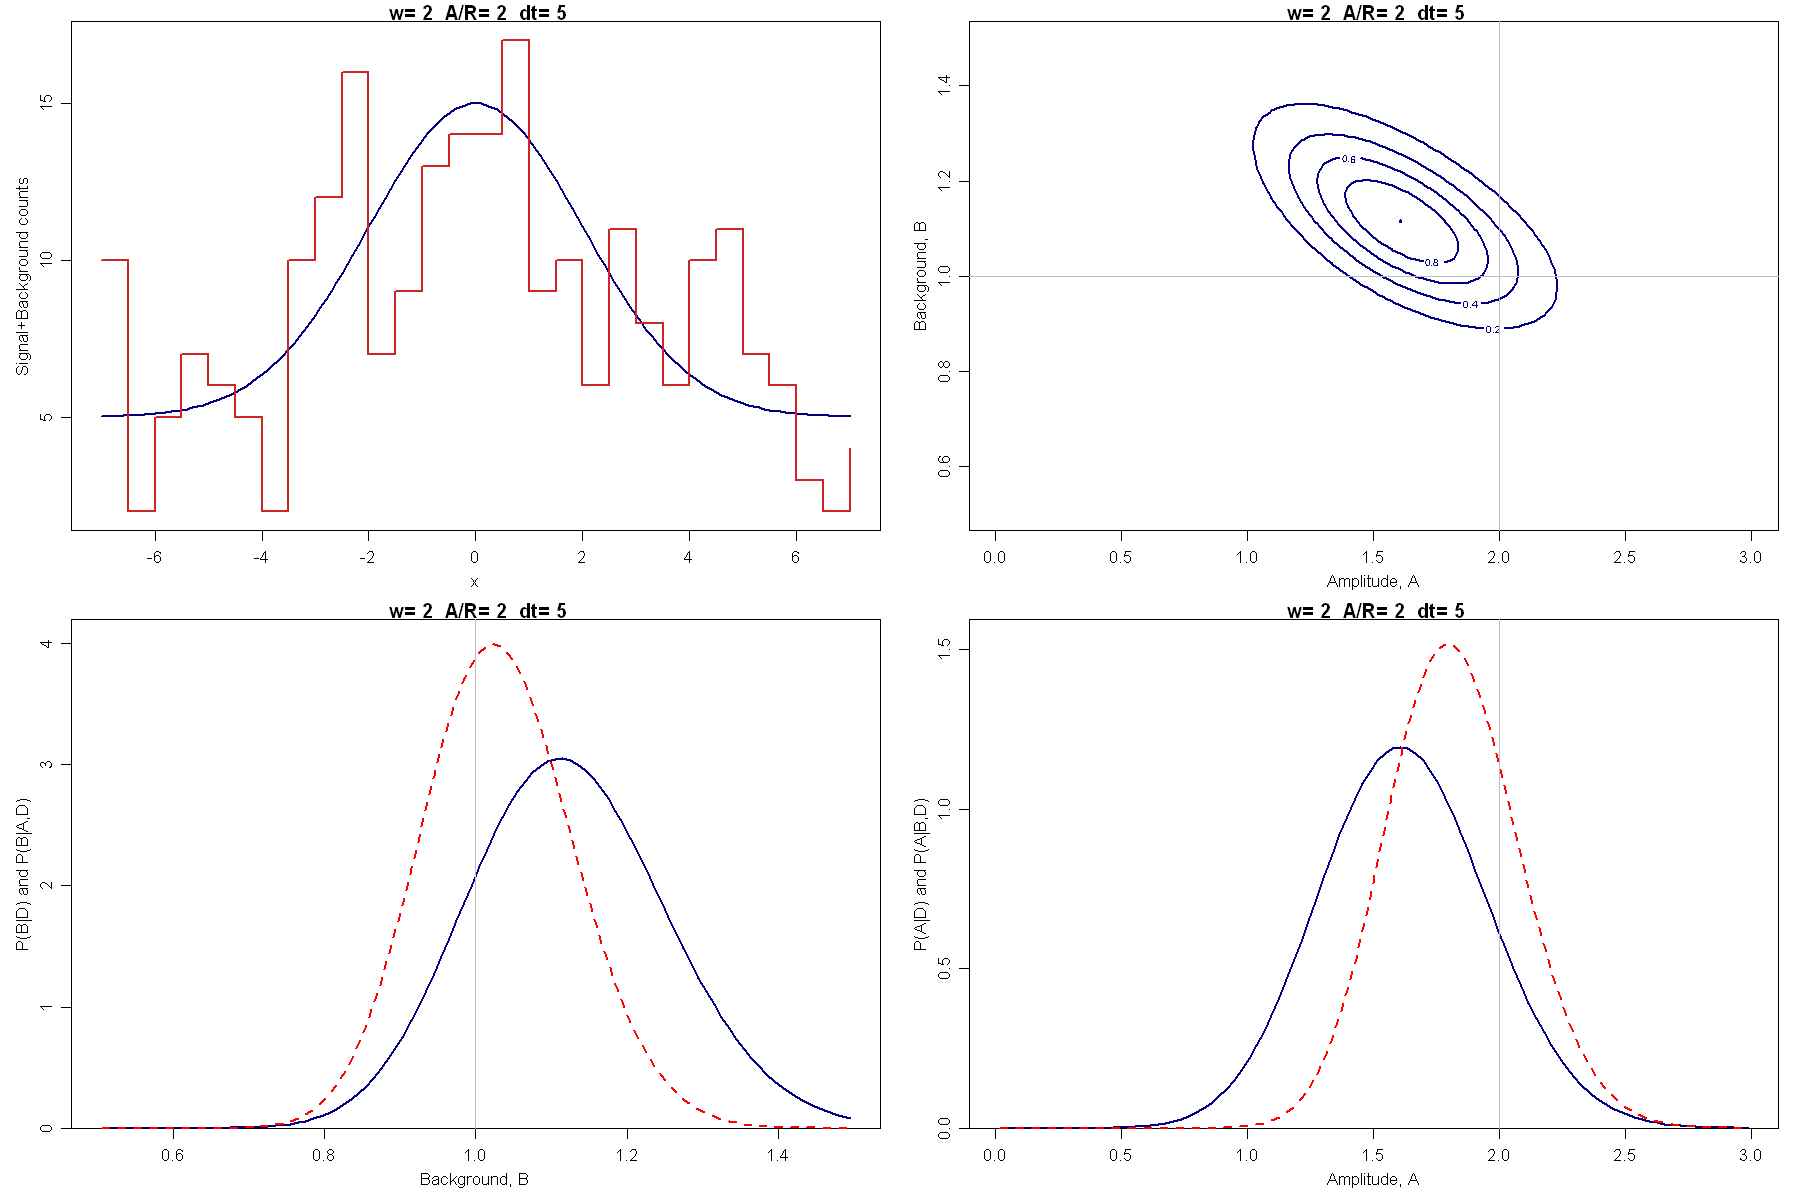

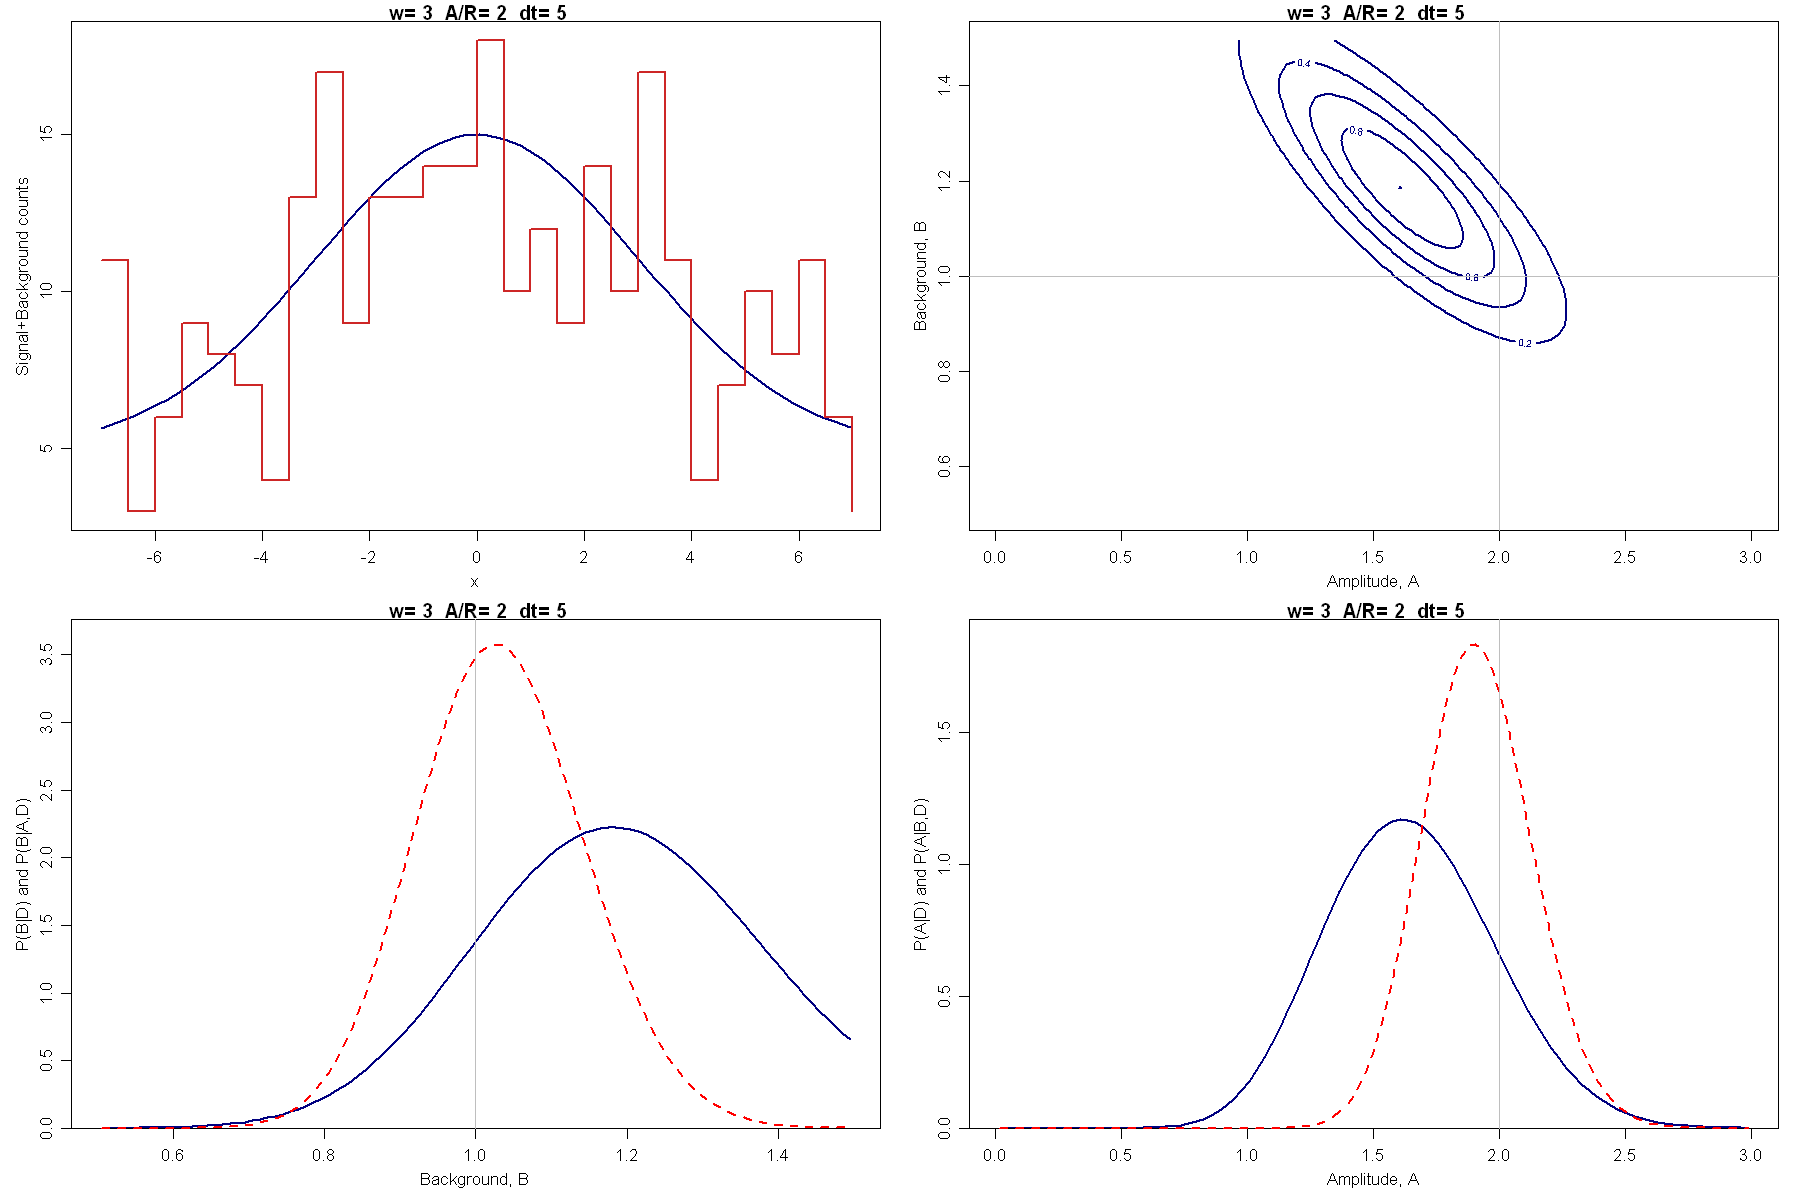

In [40]:
# Function generating the signal
signal <- function(x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
if(a<0 || b <0) {return(-Inf )} # the effect of the prior
sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

# Run the experiment for a resolution w in the sample
experiment <- function(w, A.true, B.true, Delta.t){
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    # Generate the observed data
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    
    # Marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))

    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true ,
    x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddat , xdat , A.true , b,
    x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    
    par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    
    # Plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="navy", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, col= "navy", xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", col= "navy", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, col= "red",p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", col="navy", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, col="red",lwd=2, lty=2) 
    abline(v=A.true, col="grey")
}

sample.resolution <- c(0.1, 0.25, 1, 2, 3)
options(repr.plot.width=15, repr.plot.height=10)

# Change the resolution w for each iteration
for (w in sample.resolution){
 experiment(w, A.true=2, B.true=1, Delta.t=5)   
}

### b)

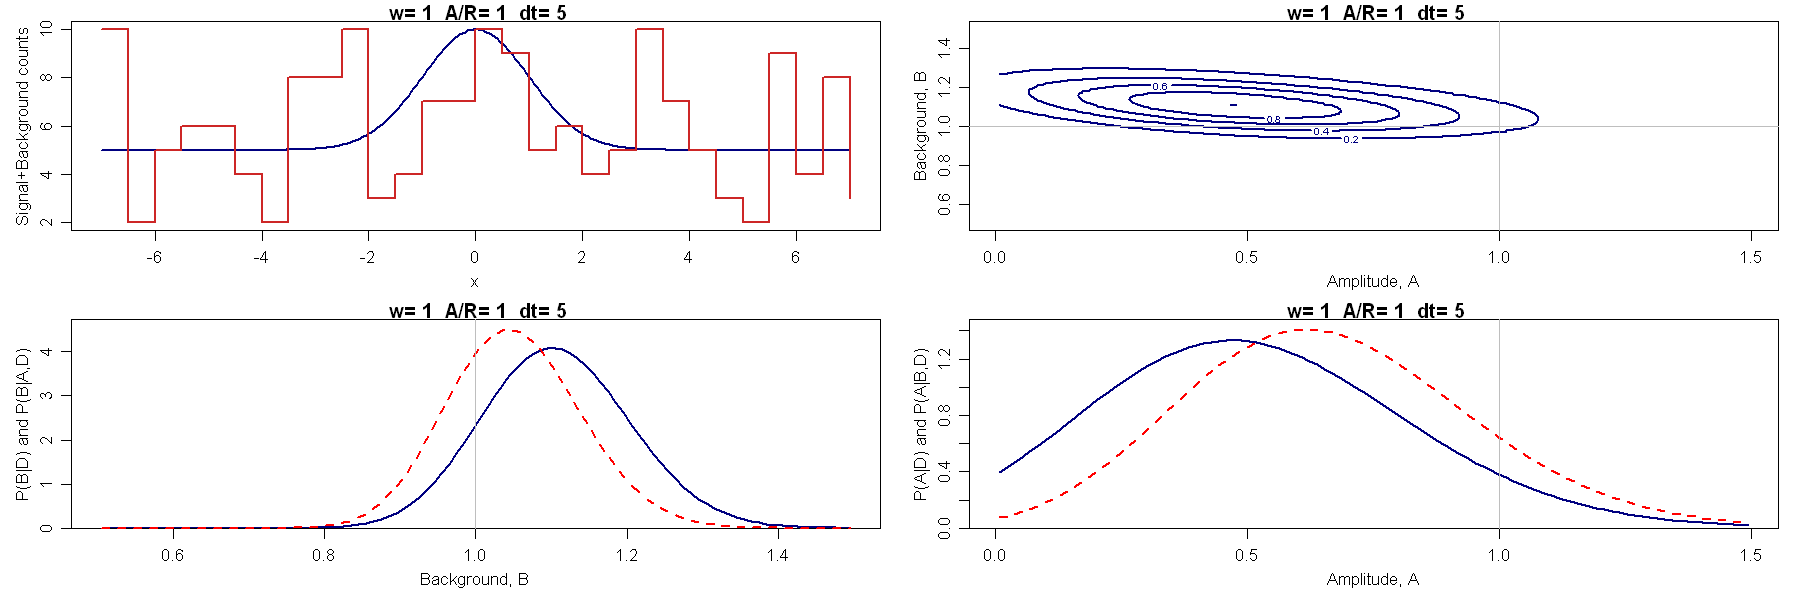

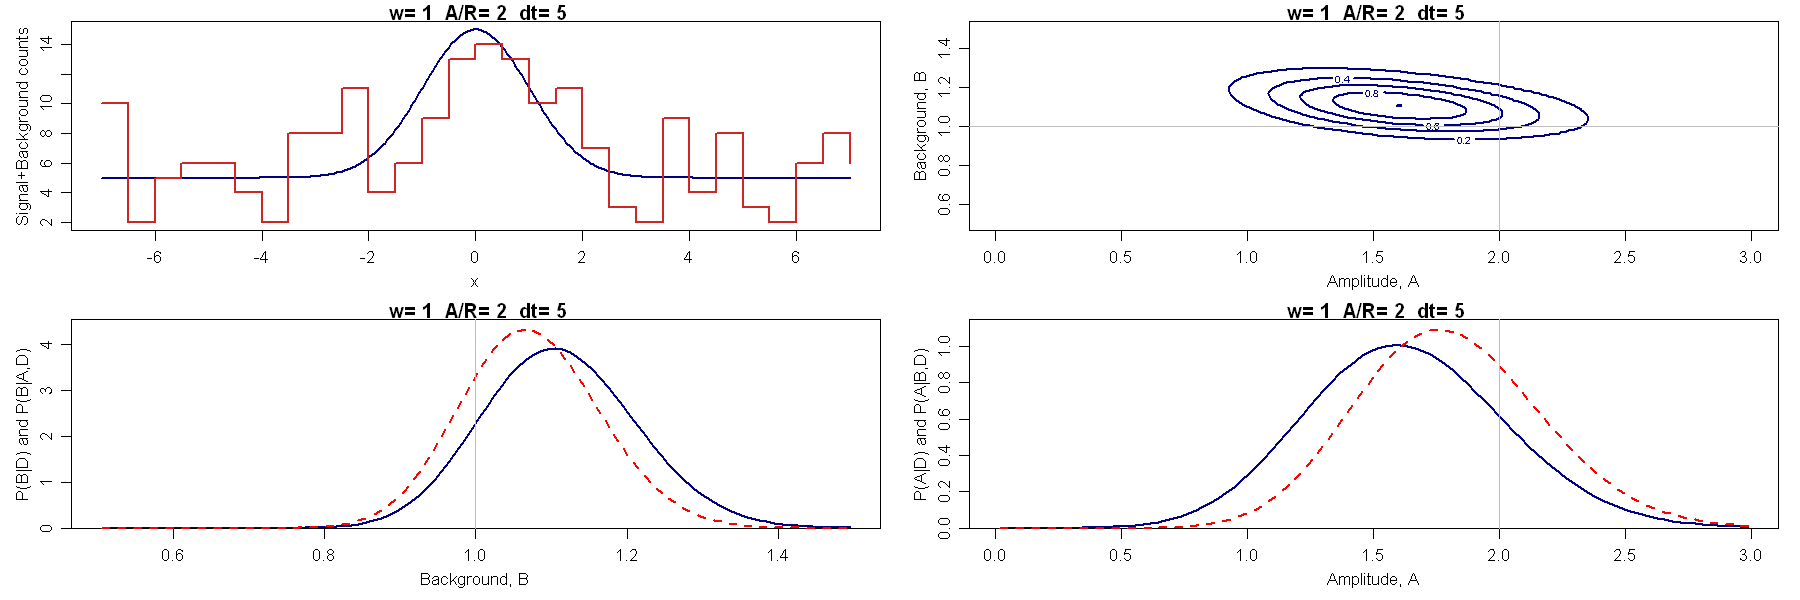

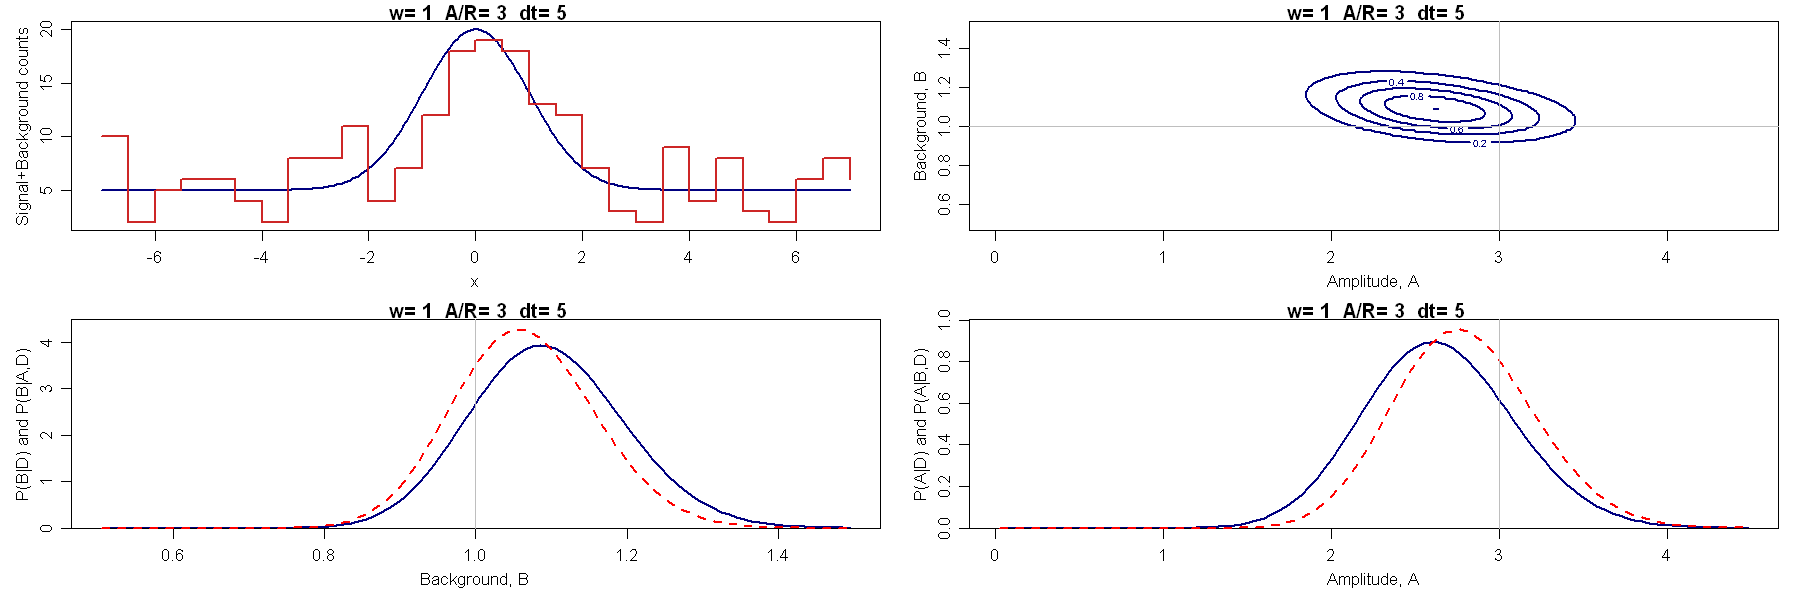

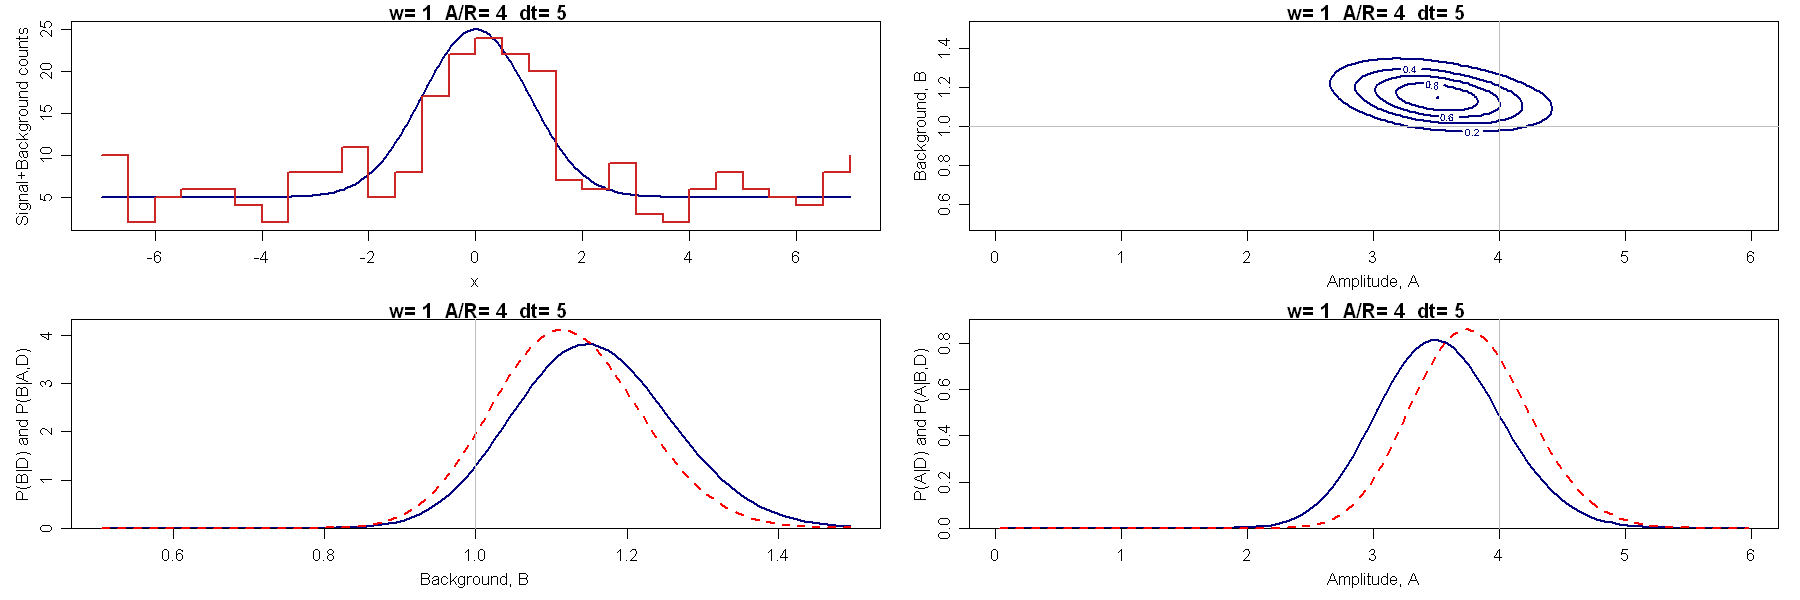

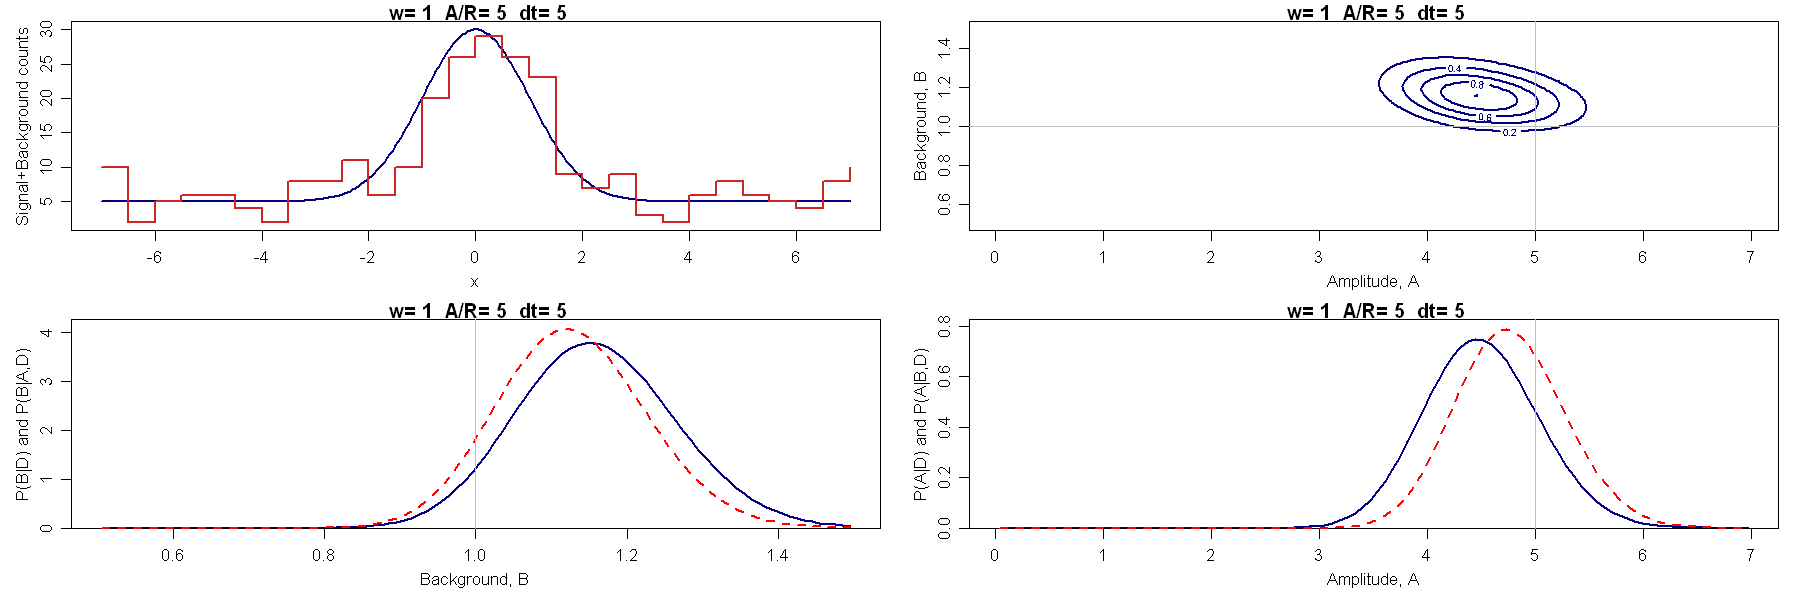

In [46]:
# Run the experiment for a resolution w in the sample
experiment <- function(w, A.true, B.true, Delta.t){
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    # Generate the observed data
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    
    # Marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))

    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true ,
    x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddat , xdat , A.true , b,
    x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    
    par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    
    # Plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="navy", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, col= "navy", xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", col= "navy", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, col= "red",p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", col="navy", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, col="red",lwd=2, lty=2) 
    abline(v=A.true, col="grey")
}

sample.resolution <- c(0.1, 0.25, 1, 2, 3)
options(repr.plot.width=15, repr.plot.height=5)

# Change the A/B ratio for each iteration
sample.Atrue <- c(1, 2, 3, 4, 5)
options(repr.plot.width=15, repr.plot.height=5)
for (A_value in sample.Atrue) experiment(w=1, A_value, B.true=1, Delta.t=5)   